# POSITION SALARIES ANALYSIS

In [1]:
# importing the packages--
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
# reading the data file--
data = pd.read_csv("C:/ANKITA/ASSIGNMENTS/Day 23 - 21st May/Assignments/Polynomial/Position_Salaries.csv")
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
# data analysis--
print(data.dtypes)

Position    object
Level        int64
Salary       int64
dtype: object


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes
None


In [5]:
# checking the missing values--
data.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [6]:
data.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


# Exploratory Data Analysis

<Axes: xlabel='Position', ylabel='Salary'>

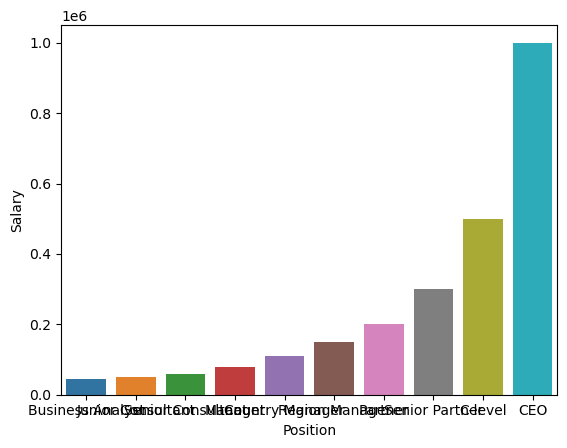

In [7]:
sns.barplot(x='Position',y='Salary',data=data, estimator='sum',errorbar=None)

<Axes: xlabel='Level', ylabel='Salary'>

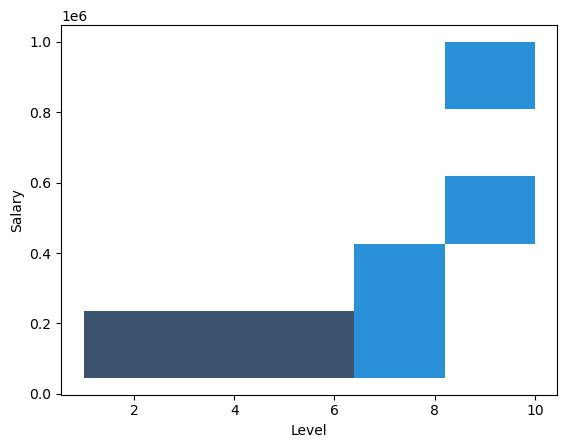

In [8]:
sns.histplot(x='Level',y='Salary',data=data)

<Axes: xlabel='Position', ylabel='Level'>

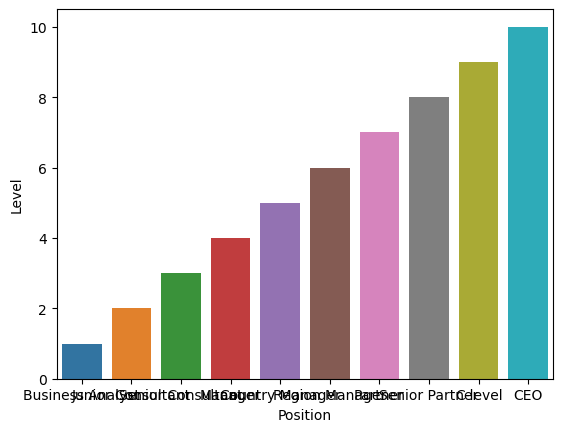

In [9]:
sns.barplot(x='Position',y='Level',data=data)

C:\Users\Amdin\AppData\Local\Temp\ipykernel_6748\3916738982.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot = True)


<Axes: >

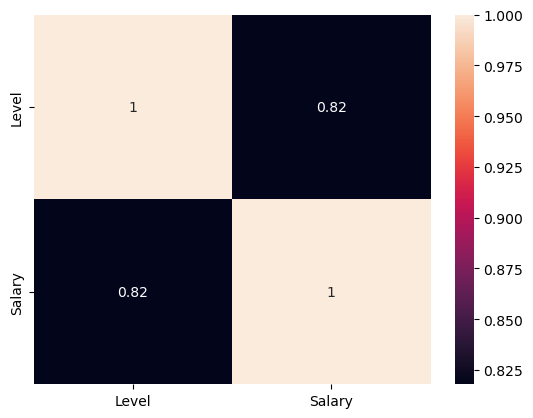

In [10]:
sns.heatmap(data.corr(),annot = True)

# Linear Regression Model

In [11]:
X = data['Level']
y = data['Salary']

In [12]:
X = X.values.reshape(-1,1)
y = y.values.reshape(-1,1)

In [13]:
model = LinearRegression()
model_train = model.fit(X,y)
print('Model Training Completed')

Model Training Completed


In [14]:
print(model_train.coef_)       ###  this is m value
print(model_train.intercept_)  ###  this is y value
                               ###  y = mx + b

[[80878.78787879]]
[-195333.33333333]


In [15]:
X1 = 6.5
y = round((model_train.coef_[0][0])*X1 + (model_train.intercept_[0]))
print("The Salary of {} is {}".format(X1,y))

The Salary of 6.5 is 330379


In [16]:
pred = model_train.predict(X)
pred

array([[-114454.54545455],
       [ -33575.75757576],
       [  47303.03030303],
       [ 128181.81818182],
       [ 209060.60606061],
       [ 289939.39393939],
       [ 370818.18181818],
       [ 451696.96969697],
       [ 532575.75757576],
       [ 613454.54545455]])

In [17]:
data['Pred Salary'] = pred
data

,Position,Level,Salary,Pred Salary
0,Business Analyst,1,45000,-114454.545455
1,Junior Consultant,2,50000,-33575.757576
2,Senior Consultant,3,60000,47303.030303
3,Manager,4,80000,128181.818182
4,Country Manager,5,110000,209060.606061
5,Region Manager,6,150000,289939.393939
6,Partner,7,200000,370818.181818
7,Senior Partner,8,300000,451696.969697
8,C-level,9,500000,532575.757576
9,CEO,10,1000000,613454.545455


In [18]:
data['Variation'] = data['Salary'] - data['Pred Salary']
data

,Position,Level,Salary,Pred Salary,Variation
0,Business Analyst,1,45000,-114454.545455,159454.545455
1,Junior Consultant,2,50000,-33575.757576,83575.757576
2,Senior Consultant,3,60000,47303.030303,12696.969697
3,Manager,4,80000,128181.818182,-48181.818182
4,Country Manager,5,110000,209060.606061,-99060.606061
5,Region Manager,6,150000,289939.393939,-139939.393939
6,Partner,7,200000,370818.181818,-170818.181818
7,Senior Partner,8,300000,451696.969697,-151696.969697
8,C-level,9,500000,532575.757576,-32575.757576
9,CEO,10,1000000,613454.545455,386545.454545


In [19]:
round(r2_score(data['Salary'],data['Pred Salary'])*100,2)

66.9

In [20]:
mean_squared_error(data['Salary'],data['Pred Salary'])

26695878787.878788

In [21]:
mean_absolute_error(data['Salary'],data['Pred Salary'])

128454.54545454546

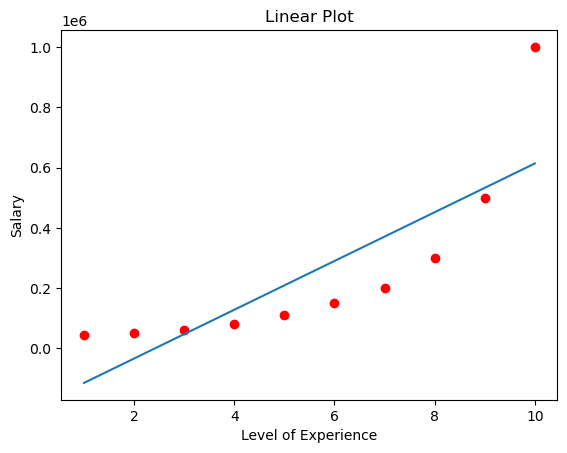

In [31]:
plt.scatter(X, y, color = 'red')
plt.plot(X, y_lin_pred)
plt.title("Linear Plot")
plt.xlabel("Level of Experience")
plt.ylabel("Salary")
plt.show()

# Polynomial Regression Model

In [44]:
poly_model = LinearRegression()
poly_features = PolynomialFeatures(degree=4)
X_poly = poly_features.fit_transform(X)
poly_model.fit(X_poly, y)

LinearRegression()

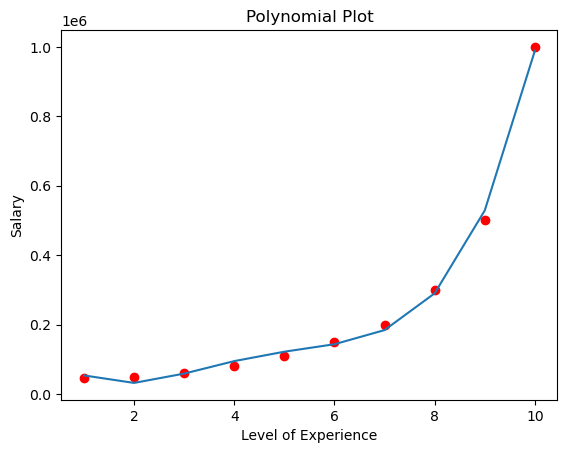

In [34]:
plt.scatter(X, y, color = 'red')
plt.plot(X, y_poly_pred)
plt.title("Polynomial Plot")
plt.xlabel("Level of Experience")
plt.ylabel("Salary")
plt.show()

In [35]:
lin_Regressor_1.predict([[6.5]])

array([330378.78787879])

In [36]:
lin_Regressor_2.predict(poly_Regressor.fit_transform([[6.5]]))

array([158862.45265153])

In [40]:
round(r2_score(y, poly_model.predict(X_poly))*100,2)

99.74

In [41]:
mean_squared_error(y, poly_model.predict(X_poly))

210343822.8438184

In [42]:
mean_absolute_error(y, poly_model.predict(X_poly))

12681.81818184008

In [75]:
### From the dataset of Position_Salaries, the salary of the employees are being predicted for which the models are prepared like:
### 1. Linear regression model.
### 2. Polynomial regression model.

In [76]:
### From the prediction of Linear regression model, the accuracy got around 66.9, Mean Squared Error around 26695878787.878784 and Mean Absolute Error around 128454.54545454546.
### From the prediction of Polynomial regression model the accuracy is around 99.74, Mean Squrared Error is around 210343822.84382465 and Mean Absolute Error around 12681.81818184008.

In [ ]:
### From both the prediction models the Polyomial regression model got the higher accuracy of 99.74 than Linear Regression model.
### So, according to the analysis, the polynomial regression is most efficient for the prediction of salary of the employees.